In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Período do sinal
N = 9

# Intervalo de n para um período (poderia ser 0..8, mas aqui usamos -4..4)
n_range = np.arange(-4, 5)

# Definição do sinal x[n] no intervalo -4..4
# x[n] = 1 para |n| <= 2, e 0 caso contrário.
x = np.zeros_like(n_range, dtype=float)
x[np.abs(n_range) <= 2] = 1

i)Cálculo dos coeficientes a_k

Fórmula analítica (mais direta):

a_k = (1/9) [ 1 + 2 cos(2πk/9) + 2 cos(4πk/9) ]

Mas vamos demonstrar também o cálculo via soma.

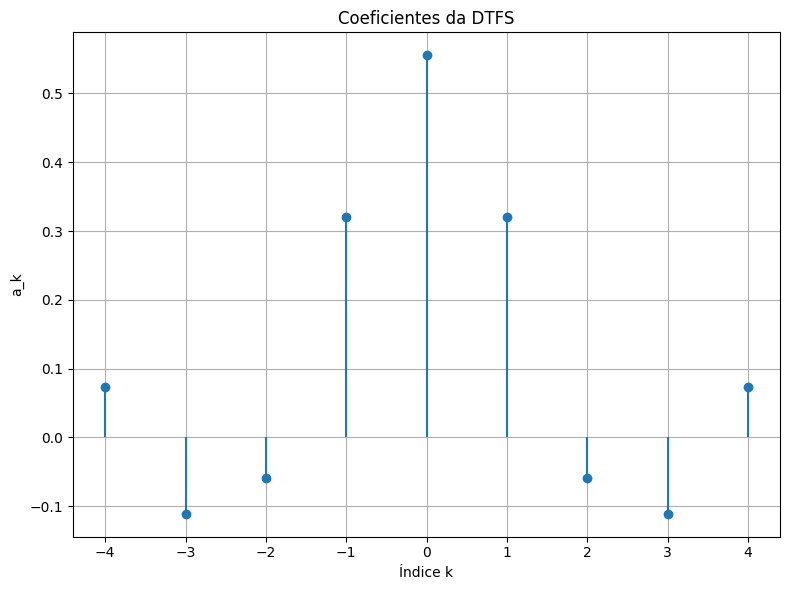

In [8]:
# Índices k originais: 0, 1, ..., 8
k_positive = np.arange(N)
# Para plotar com índices negativos, definimos k variando de -4 até 4
k_range = np.arange(-4, 5)

a_direct = (1/9) * (1 + 2*np.cos(2*np.pi*k_positive/N) + 2*np.cos(4*np.pi*k_positive/N))

# Usando a periodicidade: a_{k} = a_{k mod N}
a_coeffs = np.array([a_direct[k % N] for k in k_range])

# Plot stem dos coeficientes
fig, ax = plt.subplots(figsize=(8, 6))
ax.stem(k_range, a_coeffs, basefmt=" ")
ax.set_xlabel('Índice k')
ax.set_ylabel('a_k')
ax.set_title('Coeficientes da DTFS')
ax.grid(True)

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
fig.savefig(f"./images/result_coef.png")
plt.show()

ii) Reconstrução parcial (síntese truncada)

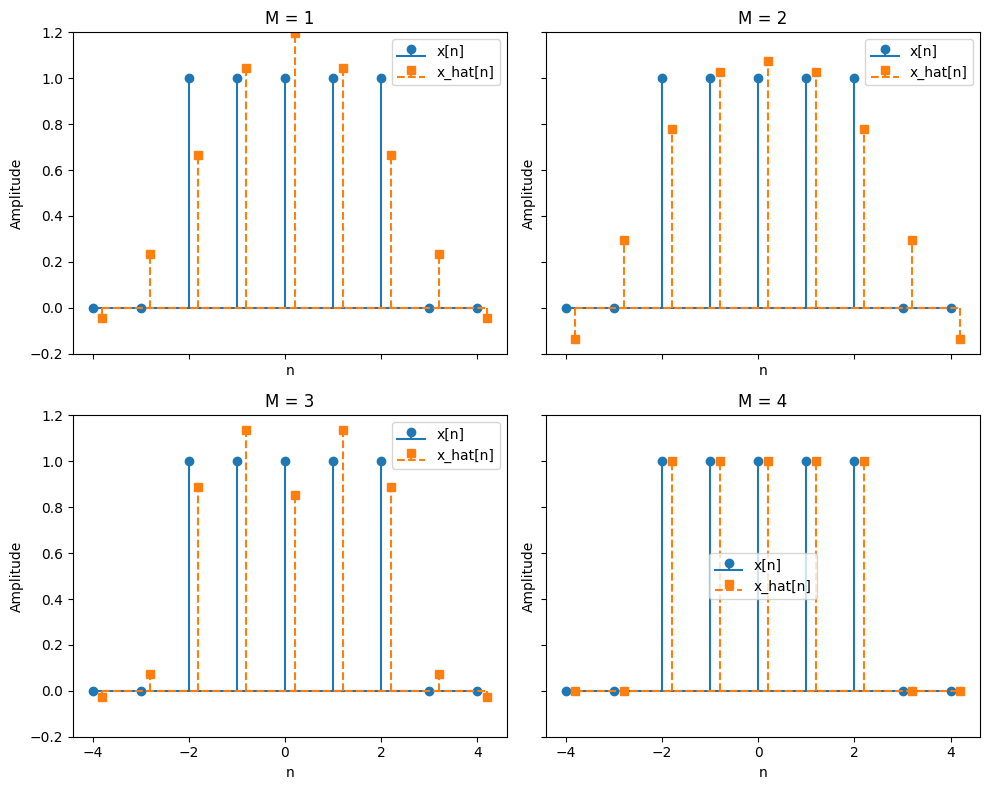

In [7]:
def x_hat_truncado(n, M, a):
    """
    Retorna o valor da soma truncada de k=-M..M para o índice n.
    """
    N = len(a)  # = 9
    soma = 0+0j
    for k in range(-M, M+1):
        soma += a[k % N] * np.exp(1j*(2*np.pi*k/N)*n)
    return soma.real  # O sinal é real

# Valores de M
Ms = [1, 2, 3, 4]

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for i, M in enumerate(Ms):
    x_hat = [x_hat_truncado(n, M, a) for n in n_range]
    ax = axes[i // 2, i % 2]
    
    ax.stem(n_range, x, linefmt='C0-', markerfmt='C0o', basefmt='C0-')
    ax.stem(n_range + 0.2, x_hat, linefmt='C1--', markerfmt='C1s', basefmt='C1--')
    
    ax.set_title(f"M = {M}")
    ax.set_xlabel("n")
    ax.set_ylabel("Amplitude")
    ax.set_ylim([-0.2, 1.2])
    ax.legend(["x[n]", "x_hat[n]"])

plt.tight_layout()
fig.savefig(f"./images/result.png")
plt.show()